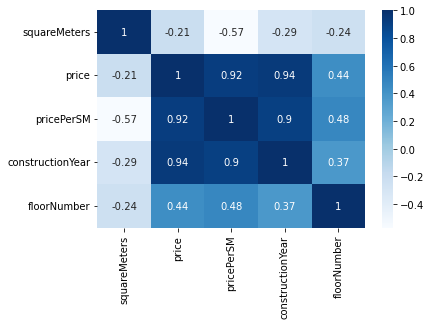

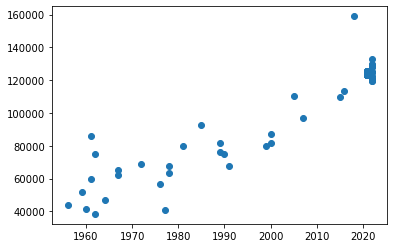

    Actual      Predicted    Difference
0   125000  124315.735347   -684.264653
1   125900  124315.735347  -1584.264653
2    59600   48402.383090 -11197.616910
3   123100  124315.735347   1215.735347
4   119900  126104.930315   6204.930315
5   125900  124315.735347  -1584.264653
6    65300   53210.651637 -12089.348363
7    41000   62598.786463  21598.786463
8    75000   49160.812621 -25839.187379
9   133100  126104.930315  -6995.069685
10   86000   48402.383090 -37597.616910
11  125450  124315.735347  -1134.264653
12  123100  124315.735347   1215.735347
13  110100   98025.017517 -12074.982483
14  123100  124315.735347   1215.735347
15  113500  115627.451867   2127.451867
16   82000   76132.232216  -5867.767784
17   80000   66835.064264 -13164.935736
18  121000  126104.930315   5104.930315
Coeffiecients: [[ 0.00000000e+00 -3.29390105e+04  8.58971197e+00]]
Intercept: [31609884.27189273]
R2 score: 0.766091437811881
Mean Absolute Error: 8868.257308592334
Mean Squared Error: 173793131.90303

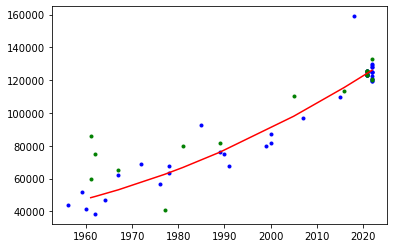

In [2]:
""" ########################

POLYNOMIAL REGRESSION USING SKLEARN

    Predicts the relationship between two variables

    Question:
    How I could predict the selling price using different variables?

    Steps for polynomial regression
    1. Create x and y
    2. Create Train and Test set
    3. Train the model
    4. Make prediction
    5. Evaluate the model

    https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/

########################### """

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np

data = pd.DataFrame(pd.read_csv("housePrices.csv", sep="\;", decimal=",", engine="python"))
data.head()

# Check the possible null values
#data.info()
#print(data.describe())

# Create correlation matrix to review correlations
corrMatrix = data.corr()
sn.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()

# Construction year seems most correlated to price
# Create scatter plot
plt.scatter(data["constructionYear"], data["price"])
plt.show()

# Prepare the data
x = data["constructionYear"].values
y = data["price"].values

# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7,
                                                            test_size = 0.3,
                                                            random_state = 100)

x_train = np.array(x_train)
x_train = x_train.reshape(-1,1)

y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)

x_test = np.array(x_test)
x_test = x_test.reshape(-1, 1)

y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)

# Fit the polynomial regression line using SKLEARN package
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train) # Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X
x_test_trans = poly.transform(x_test) # Transform data to polynomial features

lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

df_predictions = pd.DataFrame({"Actual": y_test[:, 0], "Predicted": y_pred[:, 0], "Difference": (y_pred[:, 0]-y_test[:, 0])})
print(df_predictions)

print("Coeffiecients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("R2 score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred)) # MAE
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False)) # RMSE

# Visualise the polynomial regression
plt.plot(x_train, y_train, "b.")
plt.plot(x_test, y_test, "g.")
plt.plot(np.sort(x_test, axis=0), np.sort(y_pred, axis=0), "r-")

plt.show()

"""
USE ERROR METRICS FOR EVALUATION OF THE MODEL PERFORMANCE

R2 score is 0.766 which means that the construction year explains 76,7% of the apartment's price. In other words
approx. 77% of dependent variability can be explained by the model. R2 score for polynomial regression model is higher 
compared to the R2 score of linear regression and multiple linear regressions models.

The value of root mean squared error is 13183.0623 which is approx. 13% of the mean of all prices 101013.67€.
The smaller the RMSE the better. Also RMSE for polynomial regression is smaller compared to the RMSE values of
linear regression and multiple linear regression models.

Polynomial regression model performs better than linear regression or multiple linear regression models and
gives a quite good estimate for the price.

"""


